In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib.plots import load_data, climatology, single_column_initial_value, training as tp, get_error_tables
import lib.cam as lc
from xnoah.sam import coarsen

import seaborn as sns


width = 5.5
dpi = 100

sns.set_context("paper")
sns.set_style("white", {
    'figure.figsize' : (5.51, 5.51/1.61),
    'figure.dpi': 100,
    'image.cmap': 'viridis',
    'xtick.major.size': 3.5,
    'xtick.major.size': 3.5,
    'xtick.minor.size' : 1.75,
    'xtick.minor.visible' : True,
    'ytick.major.size': 3.5,
})


I put the styling commands in the following few boxes

In [2]:
# plt.style.use(["default", "paper.style"])
width = 5.5
dpi = 100
# this magic needs to happen after I reset the rcParams
plt.rc("figure", dpi=150)

Here, I load the data and select the testing region.

In [3]:
ds= load_data(best_nn="model.VaryT-20/3")
ds_test = ds.isel(x=slice(0,64))

/Users/noah/anaconda/envs/uw-machine-learning/lib/python3.6/site-packages/metpy/calc/tools.py:692: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')


# Schematic diagram

In [4]:
cld = xr.open_dataarray("../../data/raw/2/NG_5120x2560x34_4km_10s_QOBS_EQX/hires/CLD.nc")

from PIL import Image

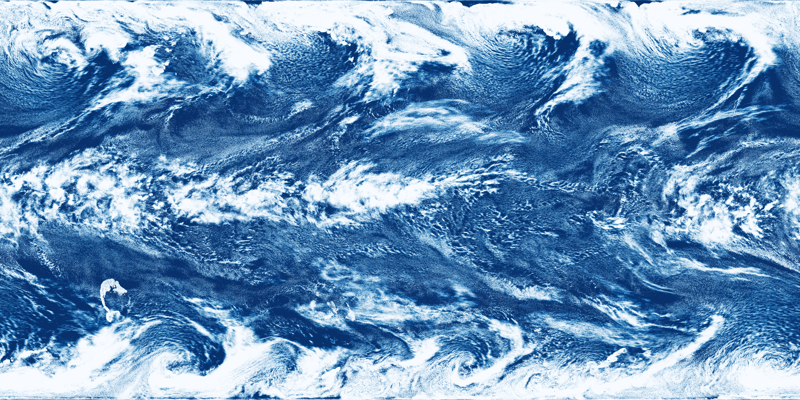

In [5]:
def image_from_xr(cld):

    cmap = plt.get_cmap('Blues_r')
    vals = np.uint8((cmap(cld.values[0]/100) * 255))
    im = Image.fromarray(vals[::-1])
    return im


im = image_from_xr(cld)
im_full = im.resize((800, 400), resample=Image.BICUBIC)
im_full

Define a small box to show the coarse graining grid on.

In [6]:
x, y = (4000, 1100)
n = 40 * 10

box = cld.isel(x=slice(x, x+ n), y=slice(y, y+n))

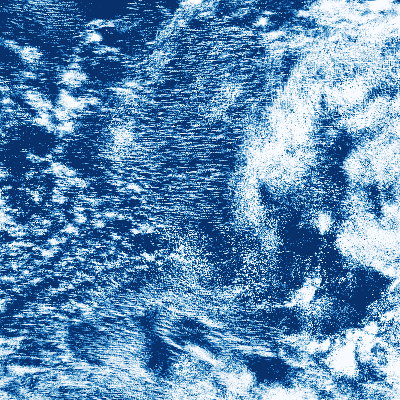

In [7]:
imhi = image_from_xr(box).resize((400, 400), Image.BICUBIC)
imhi

In [8]:
def get_im_xy(x, y):
    return (x-2560)/2560, (y-1280)/1280

In [9]:
print(f"""
\coordinate(NE) at {get_im_xy(x+n, y+n)};
\coordinate(SE) at {get_im_xy(x+n, y)};

\draw[ultra thick, red]{get_im_xy(x, y)} rectangle (NE);


""")


\coordinate(NE) at (0.71875, 0.171875);
\coordinate(SE) at (0.71875, -0.140625);

\draw[ultra thick, red](0.5625, -0.140625) rectangle (NE);





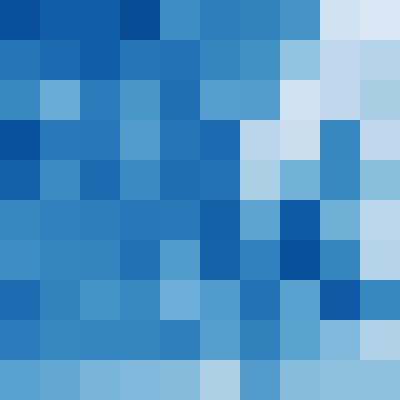

In [10]:
from xnoah.sam import coarsen

box_coarse = coarsen(box, dict(x=40, y=40)).compute()
imlo = image_from_xr(box_coarse).resize((400, 400), Image.NEAREST)
imlo

In [11]:
def save_im(name, im):
    im.save(f"../../reports/{name}")

save_im("full.png", im_full)
save_im("lo.png", imlo)
save_im("hi.png", imhi)

# Figure 2: Training Process

In [12]:
nhid, data = tp.get_plotting_data("../../data/output/")

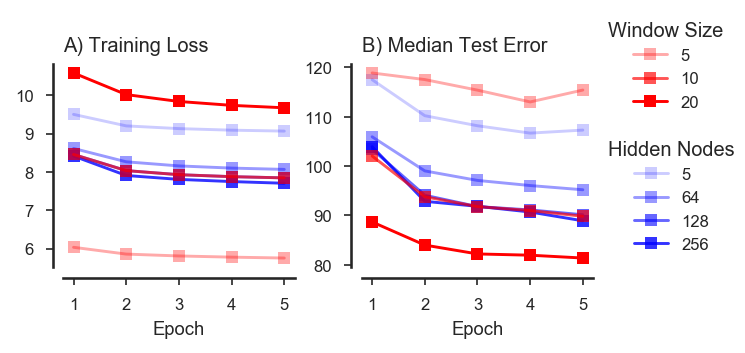

In [13]:
data = tp.get_plotting_data("../../data/output/")
axs = tp.plot_epochs_vs_loss(data)
plt.savefig("/Users/noah/Dropbox/fig2.pdf")

# Table 1: Hyper Parameters

In [14]:
df = get_error_tables("../../data/output/test_error.nc")
df

$n$ $T$ Apparent Source $R^2$                 64 Step Error               
                           $q_T$        $s_L$            $q_T$          $s_L$
0  128   2           0.64 (0.03)  0.75 (0.06)  7.03 ($\infty$)  11.93 (21.33)
1  128   5           0.64 (0.04)  0.76 (0.04)      0.43 (0.18)    0.77 (0.11)
2  128  10           0.62 (0.02)  0.75 (0.02)      0.53 (0.07)    0.85 (0.10)
3  128  20           0.57 (0.05)  0.74 (0.06)      0.26 (0.03)    0.52 (0.02)
4  128  40           0.47 (0.05)  0.70 (0.07)      0.25 (0.02)    0.50 (0.03)
5    5  10           0.58 (0.04)  0.72 (0.07)      0.53 (0.17)    0.99 (0.40)
6   64  10           0.62 (0.05)  0.75 (0.06)      0.39 (0.08)    0.77 (0.08)
7  128  10           0.62 (0.02)  0.75 (0.02)      0.53 (0.07)    0.85 (0.10)
8  256  10           0.61 (0.02)  0.75 (0.01)      0.35 (0.04)    0.62 (0.03)

Copy paste this into the latex file.

In [15]:
print(df.to_latex(index=False, escape=False))

\begin{tabular}{rrllll}
\toprule
 $n$ & $T$ & \multicolumn{2}{l}{Apparent Source $R^2$} & \multicolumn{2}{l}{64 Step Error} \\
     &                 $q_T$ &        $s_L$ &            $q_T$ &          $s_L$ \\
\midrule
 128 &   2 &           0.64 (0.03) &  0.75 (0.06) &  7.03 ($\infty$) &  11.93 (21.33) \\
 128 &   5 &           0.64 (0.04) &  0.76 (0.04) &      0.43 (0.18) &    0.77 (0.11) \\
 128 &  10 &           0.62 (0.02) &  0.75 (0.02) &      0.53 (0.07) &    0.85 (0.10) \\
 128 &  20 &           0.57 (0.05) &  0.74 (0.06) &      0.26 (0.03) &    0.52 (0.02) \\
 128 &  40 &           0.47 (0.05) &  0.70 (0.07) &      0.25 (0.02) &    0.50 (0.03) \\
   5 &  10 &           0.58 (0.04) &  0.72 (0.07) &      0.53 (0.17) &    0.99 (0.40) \\
  64 &  10 &           0.62 (0.05) &  0.75 (0.06) &      0.39 (0.08) &    0.77 (0.08) \\
 128 &  10 &           0.62 (0.02) &  0.75 (0.02) &      0.53 (0.07) &    0.85 (0.10) \\
 256 &  10 &           0.61 (0.02) &  0.75 (0.01) &      0.35 (0.04) 

# Figure 3: RCE

In [16]:
# open data
def rce_mean(x):
    return x.isel(time=slice(-400, None)).mean('time')


truth = xr.open_dataset("../../data/processed/inputs.nc").isel(x=10, y=8).pipe(rce_mean)
rce_cam = xr.open_dataset("../../data/processed/rce/10-8/cam.nc").squeeze().pipe(rce_mean)
rce_nn = xr.open_dataset("../../data/output/model.VaryT-20/3.rce.nc").isel(x=10, y=8).pipe(rce_mean)
p = xr.open_dataset("../../data/raw/2/NG_5120x2560x34_4km_10s_QOBS_EQX/stat.nc").p

# interpolate onto sam vertical grid
rce_cam_interp = lc.to_sam_z(rce_cam, p)
# compute sl for cam
sl = rce_cam_interp['T'] + 9.81/1004 * rce_cam_interp.z
qt = rce_cam_interp['Q'] *1000
rce_cam_interp = rce_cam_interp.assign(sl=sl, qt=qt)

/Users/noah/anaconda/envs/uw-machine-learning/lib/python3.6/site-packages/metpy/calc/tools.py:692: UserWarning: Interpolation point out of data bounds encountered
  warnings.warn('Interpolation point out of data bounds encountered')


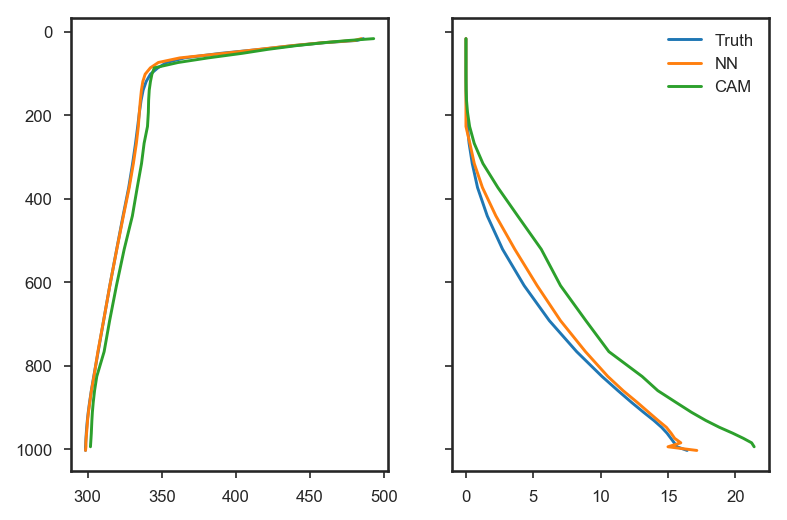

In [17]:
fig, (axT, axQ) = plt.subplots(1, 2, sharey=True)


axT.plot(truth['sl'], p, label='Truth')
axT.plot(rce_nn['sl'], rce_cam_interp.p)
axT.plot(rce_cam_interp['sl'], rce_cam_interp.p)

axQ.plot(truth['qt'], p, label='Truth')
axQ.plot(rce_nn['qt'], rce_cam_interp.p, label='NN')
axQ.plot(rce_cam_interp['qt'], rce_cam_interp.p, label='CAM')

# legends
axQ.legend()

axT.invert_yaxis()

# Figure 6: Forced Single Column

In [18]:

def plot_t_vs_p(loc, axs, cax=None,
    models = ('Truth', 'Neural Network', 'CAM'),
    levels = np.arange(11)*2, text_kwargs=dict(),
             **kwargs,):
    

    for model, ax in zip(models, axs):
        val = loc.sel(model=model)
        im = ax.contourf(val.time, val.p, val.T, levels=levels, **kwargs)
        ax.contour(val.time, val.p, val.T, levels=levels, linewidths=.1, **kwargs)
    
        # add labels
        plt.text(.04, .8, model, transform=ax.transAxes, fontsize=10, **text_kwargs)

#     axs[0].invert_yaxis()


#     plt.colorbar(im, orientation='vertical', pad=.01, **cbar_kwargs, )
    
    return im

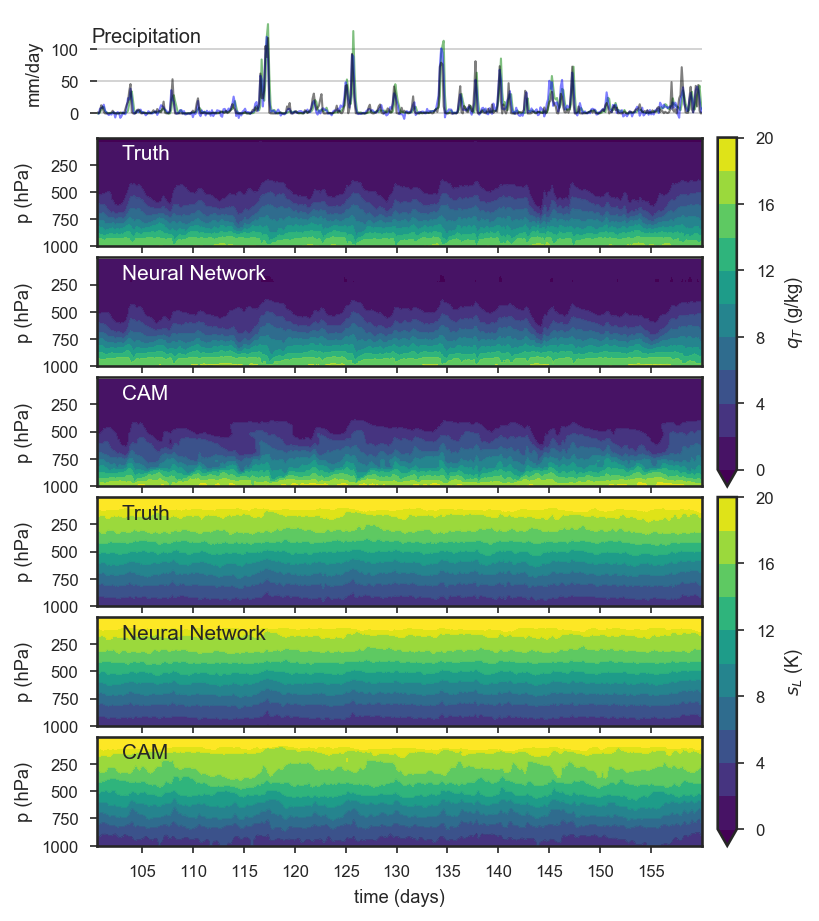

In [19]:
loc = ds.isel(x=10, y=8)

from matplotlib import gridspec


fig = plt.figure(figsize=(width, 6))
gs = gridspec.GridSpec(7, 2, width_ratios=(.95, .03),
                      height_ratios=[1]*7,
                       wspace=.05,
                      hspace=.1,
                      bottom=.07, top=.99)

# precip
axp = fig.add_subplot(gs[0, 0])
colors = {'Truth': 'k', 'CAM': 'g', 'Neural Network': 'b'}
for model, value in loc.groupby('model'):
    axp.plot(value.time, value.prec.squeeze(), label='model',
            linewidth=1.0, c=colors[model], alpha=.5)
    
for spine in set(axp.spines):
    axp.spines[spine].set_color('none')
axp.xaxis.set_visible(False)
axp.set_yticks([0, 50, 100])
axp.set_ylabel("mm/day")
axp.grid(axis='y')
axp.text(100, 110, 'Precipitation')
axp.set_xlim([ds.time.min(), ds.time.max()])

# humidity
axsq = [fig.add_subplot(gs[i, 0], sharex=axp) for i in range(1,4)]
imq = plot_t_vs_p(loc.qt, axsq, extend='min', text_kwargs={'color': 'white'})
cb = fig.colorbar(imq, cax=fig.add_subplot(gs[1:4, 1]))
cb.set_label(r"$q_T$ (g/kg)")

# temperature
axst = [fig.add_subplot(gs[i, 0], sharex=axp) for i in range(4,7)]
plot_t_vs_p(loc.sl, axst, extend='max', levels=np.arange(11)*5 + 290)
cb = fig.colorbar(imq, cax=fig.add_subplot(gs[4:, 1]))
cb.set_label(r"$s_L$ (K)")


# fix axes
for ax in axsq + axst:
    ax.set_ylabel('p (hPa)')
    ax.set_yticks([1000, 750, 500, 250])
    ax.set_ylim([1000, 0])
    
#     ax.set_xticklabels([1])
    
axp.set_xlim([100.625, 160])
axp.set_xticks(np.r_[105:160:5])

axst[-1].set_xlabel("time (days)")

plt.savefig("/Users/noah/Dropbox/fig6.pdf", bbox='tight')

# Figure 7:  Equilibrium

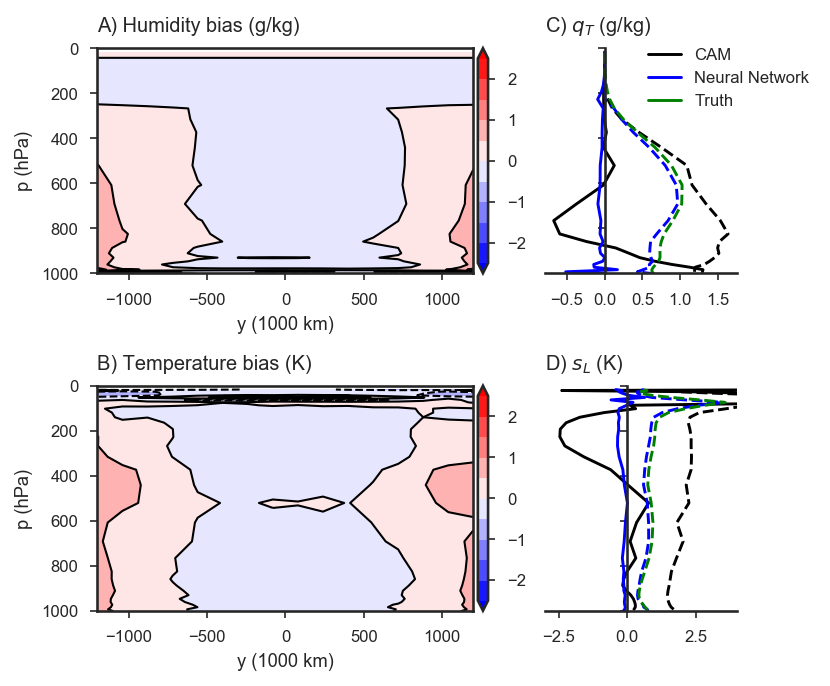

In [20]:
with plt.rc_context({'axes.titlepad': 8.0}):
    climatology.plot(ds_test, width=width)
    plt.savefig("/Users/noah/Dropbox/fig7.pdf")

# Figure 6: Precipitation

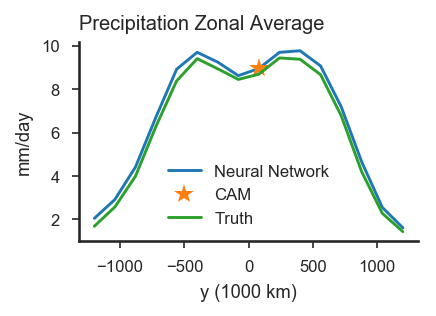

In [21]:
from lib.plots.common import despine

def plot_mean_precip(ax, ds, title=""):
    prec = ds.prec.mean(['x', 'time']).to_dataset(dim='model')
    
    key = 'Neural Network'
    ax.plot(prec.y/1000, prec[key], label=key)
    
    key = 'CAM'
    ax.plot(prec.y/1000, prec[key], label=key, marker='*', markersize=10,
           ls="")
    
    key = 'Truth'
    ax.plot(prec.y/1000, prec[key], label=key)
    
    ax.set_title(title, loc="left")
    
    ax.set_xlabel("y (1000 km)")
    ax.set_ylabel("mm/day")
    ax.set_title("Precipitation Zonal Average", loc="left")
    ax.legend()


    
fig, ax = plt.subplots(figsize=(3, 2.2))
plot_mean_precip(ax, ds_test)
despine(ax)
plt.tight_layout()
plt.savefig("/Users/noah/Dropbox/precip.pdf")

# Transient Error growth (qt)

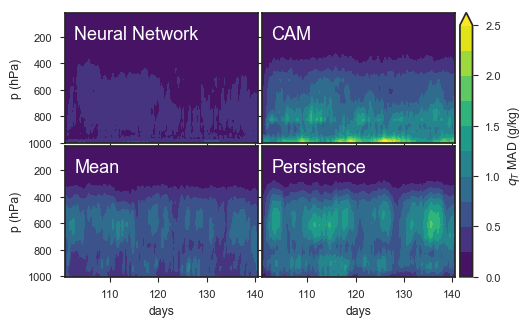

In [22]:
import lib.plots.transient_error as te
from toolz import valmap
from toolz.curried import get

mad = te.compute_errors(te.mean_absolute_dev, ds_test.isel(y=8), dims=['x'])
mad_qt = valmap(get('qt'), mad)
_, cb = te.plot_mses(mad_qt, levels=np.arange(11)*.25,
                  extend='max',
                  label='$q_T$ MAD (g/kg)')

plt.savefig("/Users/noah/Dropbox/errqt.png")

# Transient Error growth (sl)

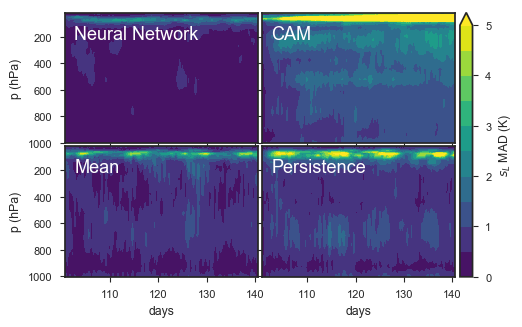

In [23]:
mad_sl = valmap(get('sl'), mad)
_, cb = te.plot_mses(mad_sl, levels=np.arange(11)*.5,
                  extend='max',
                  label='$s_L$ MAD (K)')
plt.savefig("/Users/noah/Dropbox/errqSl.png")

# Column Averaged Errors

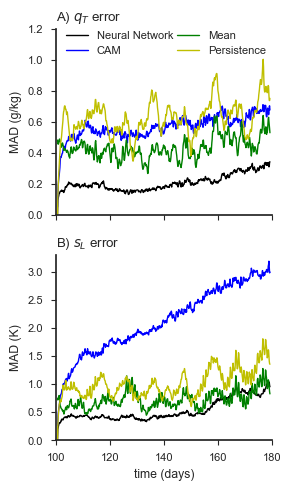

In [24]:
axs = te.plot_column_error(ds_test.isel(y=8));
plt.savefig("/Users/noah/Dropbox/errCol.pdf")